Análise preliminar dos dados disponibilizados pela ANFAVEA sobre os licenciamentos, produção, importação e exportação de veículos de passeio no Brasil, desde janeiro de 1957 até abril de 2020


<!-- TEASER_END -->

# Objetivo 
O objetivo deste artigo é revelar algumas informações que estão ocultas nos dados disponibilzados pela ANFAVEA - Associação Nacional dos Fabricantes de Veículos Automotores do Brasil. Todos os meses, a ANFAVEA disponibiliza uma planilha Excel com os dados de fabricação e licenciamento de veículos no Brasil, desde Janeiro de 1957. Temos assim uma grande base histórica e, como voces verão ao longo deste artigo, a fabricação e comércio de veículos do Brasil é repleta de (predominantemente) tropeços e (alguns) avanços, tornando desafiador o papel do empresário da cadeia da indústria automobilistica, que movimenta não somente os veículos em si, mas também o mercado de autopeças, eletrônicos, plásticos, artigos de borracha, dentre muitos outros.


# Introdução

Os dados são disponibilizados em formato Microsoft Excel (*.xlsx) através do link [ANFAVEA Estatísticas](http://anfavea.com.br/estatisticas). Há links para informações sobre produção, comercialização, importação e exportação de veículos de passeio, caminhões leves e pesados, máquinas agrícolas e veículos fora-de-estrada.

As informações estão agrupadas em dados específicos para um determinado ano e em dados que abrangem uma série histórica. Neste artigo, iremos utilizar as informações da planilha disponibilizada através do link [Séries mensais, a partir de 1957, de autoveiculos por segmento ...](http://www.anfavea.com.br/docs/SeriesTemporais_Autoveiculos.xlsm). Nos próximos artigos iremos explorar mais as demais informações presentes nesta interessante página da Anfavea.



# Procedimento

## Inspeção dos dados de entrada

Após fazer o download do arquivo e abrir no Microsoft Excel, obtemos a planilha mostrada na figura abaixo:

![Planilha ANFAVEA Série Histórica](/images/Anfavea-Planilha-Serie-Historica.png)

A planilha é composta de cinco grupos de colunas: "AUTOVEICULOS TOTAL", "AUTOMÓVEIS", "COMERCIAIS LEVES", "CAMINHÕES" e "ÔNIBUS". Cada grupo por sua vez é composto das seguintes colunas: "Licenciamento Total", "Licenciamento Nacionais", "Licenciamento Importados", "Produção" e "Exportação".

Neste artigo estamos iteressados apenas no segundo grupo, referente aos veículos de passeio. Assim, após esta primeira inspeção nos dados, já determinamos o foco da análise e poderemos seguir em frente com a codificação necessária para importar os dados e fazer alguns estudos simplificados.


## Bibliotecas Necessárias

Basicamente, usaremos [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) e [numpy](https://numpy.org/) para carregar, manipular e estruturar os dados, e usaremos a biblioteca de código [matplotlib](https://matplotlib.org/), embutida no pandas, para plotar os resultados das análises. 


In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

%matplotlib inline  

## Preparação

Como passo preliminar antes de importar os dados, é preciso definir nomes mais convenientes para as colunas dos dados. Tais nomes serão mais curtos e em inglês. Como preferência pessoal, não costumo misturar idiomas nos códigos que escrevo. Assim, como as linguagens são definidas em inglês, meus comentários, classes, métodos e nomes de variáveis também são nesse idioma. Isso é importante pois facilita o entendimento e a colaboração com desenvolvedores de outros países, quanto necessito de auxílio durante a escrita de um trecho de código.


In [2]:
# defines better column names for this dataset
dataset_group_names = ['grandtotal', 'automobile', 'light_commercial', 'truck', 'bus']
dataset_column_names = ['total', 'lic_national', 'lic_imported', 'production', 'exported']

column_names = ['date'] # this column will be de index

for group_name in dataset_group_names:
    for col_name in dataset_column_names:
        column_names.append(f"{group_name}_{col_name}")

print(f"Columns count: {len(column_names)}")
print(column_names)

Columns count: 26
['date', 'grandtotal_total', 'grandtotal_lic_national', 'grandtotal_lic_imported', 'grandtotal_production', 'grandtotal_exported', 'automobile_total', 'automobile_lic_national', 'automobile_lic_imported', 'automobile_production', 'automobile_exported', 'light_commercial_total', 'light_commercial_lic_national', 'light_commercial_lic_imported', 'light_commercial_production', 'light_commercial_exported', 'truck_total', 'truck_lic_national', 'truck_lic_imported', 'truck_production', 'truck_exported', 'bus_total', 'bus_lic_national', 'bus_lic_imported', 'bus_production', 'bus_exported']


## Leitura dos dados

Usaremos o método `read_excel` do pandas para ler os dados diretamente a partir da planilha Excel. Observe que, na mesma chamada do método, pulamos as quatro primeiras linhas (referentes ao cabeçalho da planilha), usamos os nomes simplificados para colunas conforme definimos anteriormente, definimos como limite de leitura somente as 760 primeiras linhas (até abril de 2020, que são as linhas que contém dados até o momento em que este artigo está sendo escrito), importamos somente as colunas entre A e Z (caso isso não seja feito o pandas importa uma coluna extra) e finalmente definimos como index a primeira coluna (a coluna com as datas).

Como parte da inspeção inicial, usamos o método `info()` para um primeiro contato com os dados importados.

In [3]:
# Loads the Anfavea historical dataset, from january/1957 to april/2020
vehicle_datafilename = 'data/SeriesTemporais_Autoveiculos.xlsm'
vehicle_df = pd.read_excel(vehicle_datafilename, skiprows=4, header=0, names=column_names, usecols='A:Z', nrows=760, index_col=0)

# Shows basic info
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 760 entries, 1957-01-01 to 2020-04-01
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   grandtotal_total               760 non-null    int64
 1   grandtotal_lic_national        760 non-null    int64
 2   grandtotal_lic_imported        760 non-null    int64
 3   grandtotal_production          760 non-null    int64
 4   grandtotal_exported            760 non-null    int64
 5   automobile_total               760 non-null    int64
 6   automobile_lic_national        760 non-null    int64
 7   automobile_lic_imported        760 non-null    int64
 8   automobile_production          760 non-null    int64
 9   automobile_exported            760 non-null    int64
 10  light_commercial_total         760 non-null    int64
 11  light_commercial_lic_national  760 non-null    int64
 12  light_commercial_lic_imported  760 non-null    int64
 13  l

Ao observar os resultados deste primeiro contato com os dados, notamos que estes estão "bem comportados". Isto é, não há dados inválidos ou faltantes e o algoritmo de detecção automática de tipos de dados do `pandas` foi capaz de identificar corretamente os tipos de cada coluna (`int64`), bem como a coluna dos indices `DatetimeIndex`. A partir deste momento, poderemos realizar investigações nos dados sem outra ação adicional.

## Foco nos Automóveis

O primeiro recorte nos dados que faremos será com relação a obtenção dos dados referentes aos veículos de passeio, conforme descrito no Objetivo deste artigo. Aqui a preparação que realizamos anteriormente com respeito aos nomes das colunas irá nos ajudar. Iremos filtrar as colunas que começam com `automobile`.

In [4]:
automobile_df = vehicle_df.loc[:, vehicle_df.columns.str.startswith('automobile')]
automobile_df.tail(12) 

,automobile_total,automobile_lic_national,automobile_lic_imported,automobile_production,automobile_exported
date,,,,,
2019-05-01,198776,183484,15292,230351,34983
2019-06-01,181297,167735,13562,190859,33127
2019-07-01,195854,181020,14834,221869,35773
2019-08-01,195917,180119,15798,222648,30228
2019-09-01,187818,173358,14460,203198,27424
2019-10-01,204532,189489,15043,239005,23813
2019-11-01,196770,182707,14063,186426,25140
2019-12-01,215190,196835,18355,141689,22603
2020-01-01,154581,141860,12721,162376,17445


A tabela acima mostra os doze últimos valores. Mesmo sem nenhum resultado gráfico, já fica nítido o efeito da pandemia do novo corona virus sobre os números de Abril/2020. Muitas vezes, quanto analisamos dados em forma de tabela, é importante "treinar os sentidos" e procurar identificar alguns padrões nos dados (tendências, quedas, proporções, correlações, etc). Isso ajuda a manter nossa percepção afiada e abrevia o tempo necessário para fazer as análises. 

Outra ação que se faz necessária antes de mostrarmos o primeiro resultado de forma gráfica é consolidar os números em cada ano. Para tal, usaremos o método `resample` passando como parâmetro `'A'` para consolidar de forma anual os valores. A função de consolidação sera soma: `sum()`.

Plotaremos estes resultados em um gráfico de barras empilhadas, mostrando os licenciamentos de veículos de produção nacional e importados.

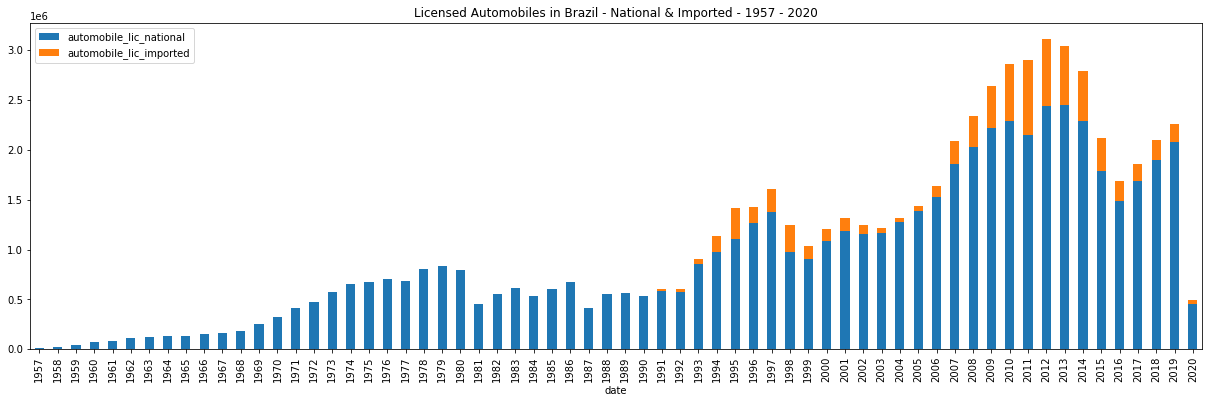

In [5]:
automobile_lic_yearly_df = automobile_df[['automobile_lic_national', 'automobile_lic_imported']].resample('A', kind='period').sum()

automobile_lic_yearly_df.plot(
    title='Licensed Automobiles in Brazil - National & Imported - 1957 - 2020',
    kind='bar',
    figsize=(21,6),
    stacked=True
)


Como esperado, o gráfico mostra uma curva crescente, compatível com o crescimento da participação da indústria automobilistica na economia brasileira a partir da criação da instalação da primeira fábrica de automóveis no Brasil pelas indústrias ROMI, no interior do estado de São Paulo (Santa Bárbara d'Oeste), onde foi produzido o veículo Romi-Isetta em 1956.

A partir 1990 houve a abertura da economia brasileira para a importação de veículos. Esta abertura teve o aspecto positivo de forçar a indústria nacional a aprimorar os veículos produzidos localmente, mas por outro lado provocou o fechamento de muitas pequenas fabricantes genuinamente nacionais sufocadas pela carga tributária imposta pelo governo. A citar a fabricante Gurgel, que pediu concordada em 1993 para finalmente encerrar suas atividades em 1996.

Continuando a tentar colocar uma perspectiva história na observação deste gráfico, vale mencionar que a partir de 1998 houve um grande impulso na indústria automobilistica brasileira, com a chegada de fabricantes como Renault (1998), Mercedes (1999), dentre outros, bem como a expansão de fabricantes que já estavam presentes no Brasil.

Na seção seguinte vamos comprovar que a decisão destas montadoras em expandir negócios no brasil a partir de 1998 foi justificada.


## Crescimento da Comercialização

Nesta seção analisaremos a variação percentual ano após ano da comercialização de veículos, nacionais e importados, a partir da abertura do mercado em 1990, mas tomando como referência o ano de 1991 (primeiro ano "cheio" após esta abertura).

Fica nítido no gráfico o forte crescimento das vendas de importados até 1995, com uma taxa média de `110,11`. Certamente empresários que investiram em importados nesse período aproveitaram bons anos de lucros. Na sequência houve um período de grande oscilação nas vendas anuais, somente experimentando uma melhora consistente entre 2005 e 2011. Depois disso, os números não foram bons (exceto em 2018) até culminar com a trajédia nas vendas provocadas pelo covid19



Imported Licensed: 1991-1995 = 110.11


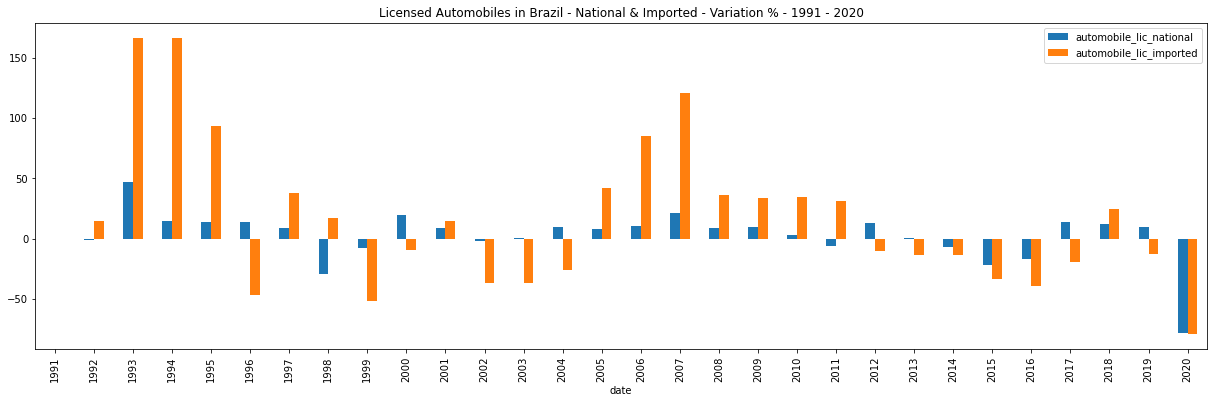

In [6]:
automobile_lic_yearly_variation_since_1991_df = automobile_lic_yearly_df.loc['1991-01-01':,['automobile_lic_national', 'automobile_lic_imported']].pct_change() * 100

automobile_lic_yearly_variation_since_1991_df.plot(
    title='Licensed Automobiles in Brazil - National & Imported - Variation % - 1991 - 2020',
    kind='bar',
    figsize=(21,6)
)

print("Imported Licensed: 1991-1995 = %.2f" % automobile_lic_yearly_variation_since_1991_df.loc['1991-01-01':'1995-12-31', 'automobile_lic_imported'].mean())


O impacto das novas montadoras que se instalaram no país a partir de 1998 pode ser identificado no grafico mais abaixo. Embora em 1999 oservemos uma retração de `-7,51%`, as vendas se mostraram bastante pujantes a partir de 2000 (com exceção de uma pequena queda em 2002), resultando em uma média de `+7,6%` e cujo melhor ano foi em 2007 com um crescimento de `+21,3%` nas vendas de veículos nacionais. Naquele ano, o Brasil se consolidou como a sexta maior indústria automobilística mundial.

In [7]:
automobile_lic_yearly_variation_since_1991_df.loc['1999-01-01':'2010-12-31', 'automobile_lic_national'].describe()

count    12.000000
mean      7.601852
std       8.329894
min      -7.516355
25%       2.274339
50%       9.002218
75%       9.979868
max      21.336157
Name: automobile_lic_national, dtype: float64

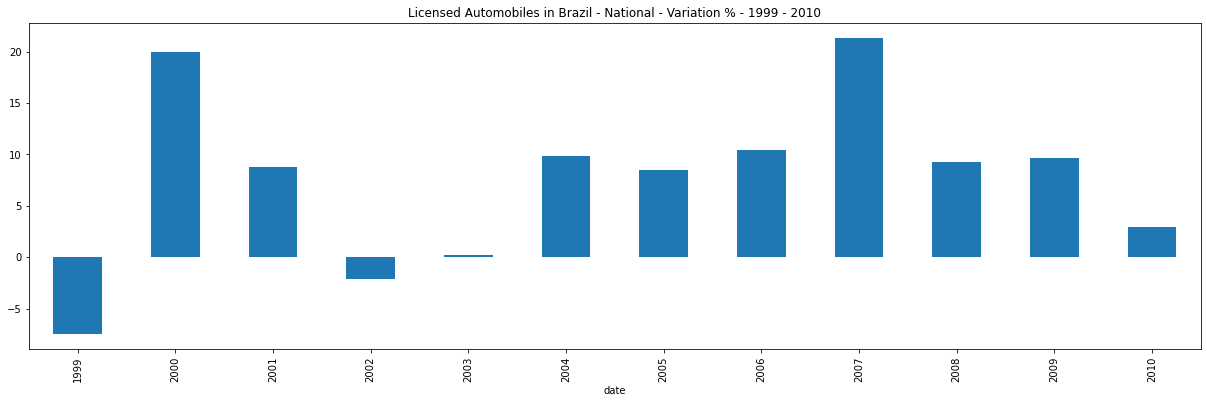

In [8]:
automobile_lic_yearly_variation_since_1991_df.loc[
        '1999-01-01':'2010-12-31', 
        'automobile_lic_national'].plot(
    title='Licensed Automobiles in Brazil - National - Variation % - 1999 - 2010',
    kind='bar',
    figsize=(21,6)
)

# Conclusão & Próximos Passos

Esta primeira análise dos dados de comercialização de vericulos de passeio no Brasil revelou alguns números interessantes. Trata-se de um negócio de altos e baixos, exigindo bastante gerenciamento por parte dos empresários. À parte a discussão sobre a (muito provável) exorbitante margem de lucro que está incorporada nos preços dos veículos e os constantes solavancos que a economia brasileira atravessou nas últimas decadas, ainda assim me parece que a indústria automotiva é bastante promissora, visto que o consumidor brasileiro tem um perfil bastante passional no momento de adquirir veículos e considerando-se também a péssima infra-estrutura de transporte público na maioria das cidades.

Entretanto, o advento do Covid-19 pode mudar as perspectivas da indústria automobilística nacional. Se por um lado a desvalorização cambial pode favorecer a produção para exportação de veículos, por outro a retração da economia pode demandar um tempo maior para voltar a apresentar números de crescimento na casa dos dois dígitos, como os apresentados na primeira decada deste século, devido principalmente à recuperação dos empregos perdidos e do poder econômico da população, pois provavelmente os empregos que surgirem pós-pandemia terão salários menores do que anteriormente. Outro aspecto negativo aos negócios será o que esta sendo chamado de "novo normal": mudança do hábito do consumidor, que possivelmente usará mais veículos compartilhados, teletrabalho e compras online, exigindo assim portanto menor necessidade de transporte.

Nos próximos artigos continuarei a investigar os números da comercialização de veículos de passeio no Brasil, focando no desempenho por trimestre e tentando identificar se existe ou não sazonalidade. Até lá!